# Oversampling

## Tujuan:

1. Menganalisa distribusi kelas dalam dataset iris
2. Menampilkan teknik SMOTE untuk menyeimbangkan data
3. Memvisualisasikan hasil sebelum dan sesudah SMOTE
4. Membandingkan distribusi menggunakan PCA

## Load dataset from database

Pastikan kamu sudah install:

- `mysql-connector-python` (untuk MySQL)
- `psycopg2` atau `sqlalchemy` (untuk PostgreSQL)
- `pandas`

In [7]:
import pandas as pd
from sqlalchemy import create_engine

USER = "root"
PASSWORD = ""
HOST = "localhost"
PORT = 3306
DBNAME = "iris_dataset"

# Buat koneksi ke MySQL (pakai driver PyMySQL)
engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

# Query ke database MySQL
query = "SELECT * FROM iris_1;"
df = pd.read_sql(query, engine)

print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0  36            5.0           3.2            1.2           0.2  Iris-setosa
1  37            5.5           3.5            1.3           0.2  Iris-setosa
2  38            4.9           3.1            1.5           0.1  Iris-setosa
3  39            4.4           3.0            1.3           0.2  Iris-setosa
4  40            5.1           3.4            1.5           0.2  Iris-setosa


## Scatter Plot PCA iris

explained variance ratio (first two components): [0.8962252 0.0647599]


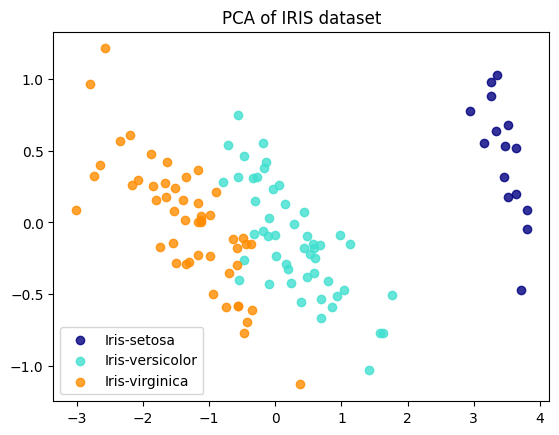

In [8]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

x = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# PCA
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

print("explained variance ratio (first two components): %s"
      % str(pca.explained_variance_ratio_))

# Visualisasi PCA
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.show()

## Oversampling using imbalanced with SMOTE

Distribusi sebelum SMOTE : {0: 15, 1: 50, 2: 50}
Distribusi sesudah SMOTE : {0: 50, 1: 50, 2: 50}


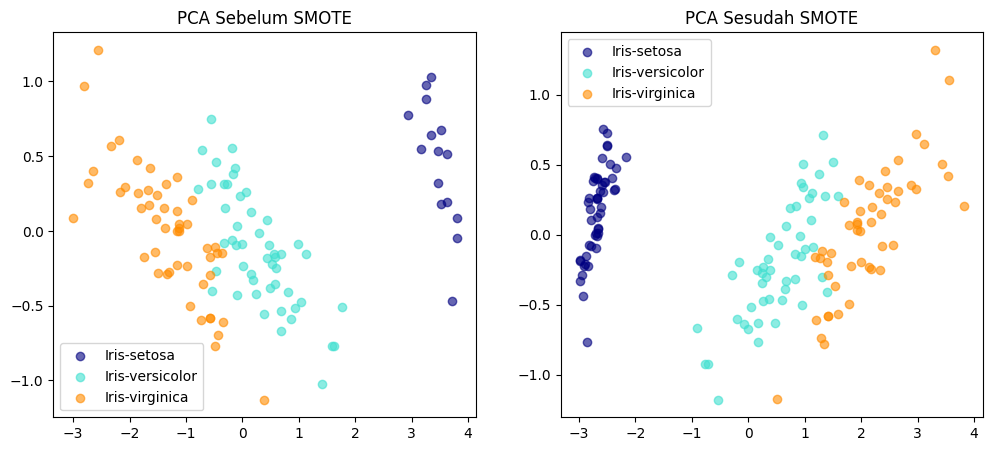

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np

# Pisahkan fitur & target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# Oversampling dengan SMOTE (imbalanced-learn)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi sebelum SMOTE :", dict(zip(*np.unique(y, return_counts=True))))
print("Distribusi sesudah SMOTE :", dict(zip(*np.unique(y_res, return_counts=True))))

# PCA sebelum SMOTE
pca = PCA(n_components=2)
X_r_before = pca.fit(X).transform(X)

# PCA sesudah SMOTE
X_r_after = pca.fit(X_res).transform(X_res)

# Visualisasi sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ["navy", "turquoise", "darkorange"]

# Plot sebelum SMOTE
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    axes[0].scatter(X_r_before[y == i, 0], X_r_before[y == i, 1],
                    alpha=0.6, color=color, label=target_name)
axes[0].set_title("PCA Sebelum SMOTE")
axes[0].legend()

# Plot sesudah SMOTE
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    axes[1].scatter(X_r_after[y_res == i, 0], X_r_after[y_res == i, 1],
                    alpha=0.6, color=color, label=target_name)
axes[1].set_title("PCA Sesudah SMOTE")
axes[1].legend()

plt.show()